In [ ]:
# %load ./matplotlib_sourcecode/0302\ -\ getting\ data\ from\ the\ internet.py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib
import numpy as np

def graph_data(stock):
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    print(url)



stock = input('Stock to plot: ')
graph_data(stock)


In [14]:
url = 'http://chartapi.finance.yahoo.com/instrument/1.0/{}/chartdata;type=quote;range=10y/csv'.format('tsla')

In [15]:
print url

http://chartapi.finance.yahoo.com/instrument/1.0/tsla/chartdata;type=quote;range=10y/csv


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.finance import candlestick2_ohlc
from matplotlib import style
from matplotlib.ticker import FuncFormatter, MaxNLocator
import random 

%matplotlib inline 


In [2]:
google = data.DataReader('AAPL',data_source='google', start='2011-01-01', end = '2017-08-01')

In [3]:
google.head()

,Open,High,Low,Close,Volume
Date,,,,,
2011-01-03,46.52,47.18,46.41,47.08,111280407
2011-01-04,47.49,47.50,46.88,47.33,77337001
2011-01-05,47.08,47.76,47.07,47.71,63879193
2011-01-06,47.82,47.89,47.56,47.68,75106626
2011-01-07,47.71,48.05,47.41,48.02,77982212


In [7]:
open_price = google['Open'].to_frame().reset_index()

In [8]:
open_price.head()

,Date,Open
0,2011-01-03,46.52
1,2011-01-04,47.49
2,2011-01-05,47.08
3,2011-01-06,47.82
4,2011-01-07,47.71


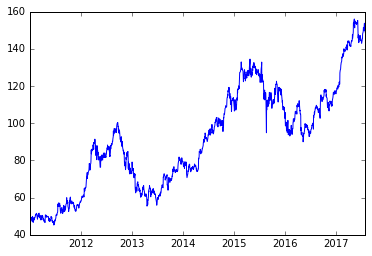

In [4]:
plt.plot(google['Open'])

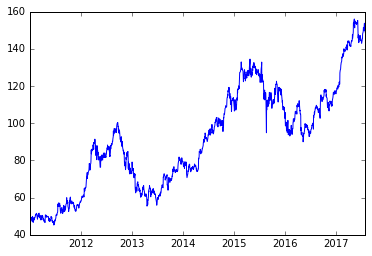

In [9]:
plt.plot_date(open_price['Date'], open_price['Open'],'-')

In [12]:
x = open_price['Date']
y = open_price['Open']  

In [63]:
date_format = '%Y%m%d'
date_converter = mdates.strpdate2num(date_format)
parsed_date = x.apply(lambda x : date_converter)

In [13]:
x_index = pd.DatetimeIndex(x)

In [14]:
x_index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2017-07-19', '2017-07-20', '2017-07-21', '2017-07-24',
               '2017-07-25', '2017-07-26', '2017-07-27', '2017-07-28',
               '2017-07-31', '2017-08-01'],
              dtype='datetime64[ns]', length=1656, freq=None)

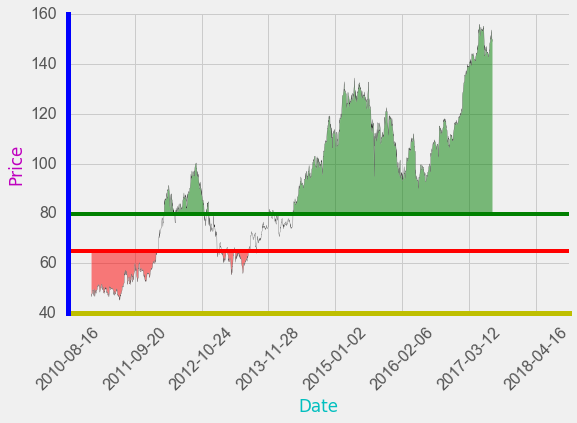

In [213]:
x = open_price['Date']
y = open_price['Open']  
x_date = x.apply(lambda t : mdates.date2num(t))

fig = plt.figure(figsize=(8,5))
ax1 = plt.subplot2grid((1,1), (0,0))
ax1.plot(x_date, y , linestyle = '-' , color = 'black', linewidth = 0.2)

ax1.fill_between(x_date, y , 80, where= y>=80, facecolor = 'g', alpha = 0.5)
ax1.fill_between(x_date, y , 65, where= y<65, facecolor = 'r', alpha = 0.5)

ax1.axhline(80, color = 'g')
ax1.axhline(65, color ='r')

ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.yaxis.label.set_color('m')
ax1.xaxis.label.set_color('c')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%m-%d'))
ax1.xaxis.set_major_locator(MaxNLocator(nbins = 10, prune = 'upper'))


ax1.spines['left'].set_color('b')
ax1.spines['bottom'].set_color('y')
ax1.spines['left'].set_linewidth(5)
ax1.spines['bottom'].set_linewidth(5)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

for tick_label in ax1.xaxis.get_ticklabels():
    tick_label.set_rotation(45)

ax1.grid(True)

plt.show()

In [150]:
google.drop(labels='Volume', axis= 1).head()

,Open,High,Low,Close
Date,,,,
2011-01-03,46.52,47.18,46.41,47.08
2011-01-04,47.49,47.50,46.88,47.33
2011-01-05,47.08,47.76,47.07,47.71
2011-01-06,47.82,47.89,47.56,47.68
2011-01-07,47.71,48.05,47.41,48.02


In [214]:
quotes = []
for timestaple in first_1000.index:
    new_line = (mdates.date2num(timestaple),\
                first_1000.loc[i]['Open'],\
                first_1000.loc[i]['High'],\
                first_1000.loc[i]['Low'],\
                first_1000.loc[i]['Close'],\
                first_1000.loc[i]['Volume'])
    quotes.append(new_line)

In [220]:
style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

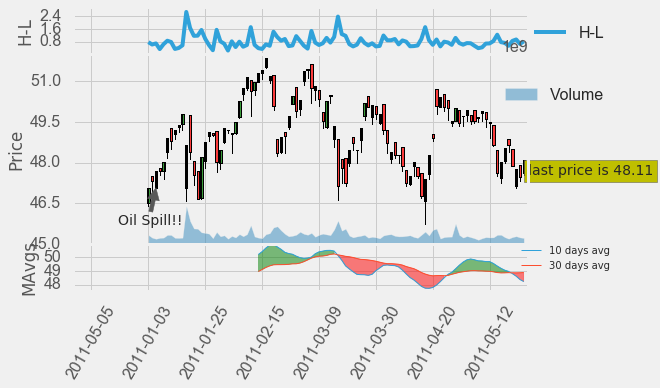

In [197]:
style.use('fivethirtyeight')

fig = plt.figure(figsize=(8,5))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan= 1)
ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan= 1, sharex = ax1)
ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan= 1, sharex = ax1)

first_1000 = google.iloc[0:100]
open_p, high_p, low_p, close_p = first_1000['Open'], first_1000['High'], first_1000['Low'], first_1000['Close']
volume = first_1000['Volume']
labels = [idx.strftime('%Y-%m-%d') for idx in first_1000.index]

high_low = high_p-low_p
ax1.plot([i for i in range(0,len(first_1000))], high_low, '-', label = 'H-L')
ax1.set_ylabel('H-L')
ax1.yaxis.set_major_locator(MaxNLocator(nbins = 4, prune = 'lower'))
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.legend(bbox_to_anchor=(0.2, 0.9, 1, 0))

candlestick2_ohlc(ax2, open_p, close_p, low_p, close_p,\
                    width= 0.6, colorup = 'g', colordown = 'r')
# ax2.set_title('candle chart'.title())
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')
ax2.annotate('Oil Spill!!', xy = (2,low_p[2]), 
             xytext=(0.1, 0.1), textcoords='axes fraction',
             arrowprops={'facecolor':"#585858", 'edgecolor':"#585858"})

last_idx = len(first_1000)-1
ax2.annotate('last price is {}'.format(close_p[last_idx]), xy = (last_idx,low_p[last_idx]), 
             xytext=(last_idx+1,low_p[last_idx]),
             bbox={'facecolor':"y", 'edgecolor':"#585858"})

plt.setp(ax2.get_xticklabels(), visible=False)
ax2.grid(True)
ax2.yaxis.set_major_locator(MaxNLocator(nbins = 5))
# ax2.plot([i for i in range(0,len(first_1000))], open_p, '-', label = 'open')
# ax2.plot([i for i in range(0,len(first_1000))], close_p, '-', label = 'close')
# ax2.plot([i for i in range(0,len(first_1000))], low_p, '-', label = 'low')
# ax2.plot([i for i in range(0,len(first_1000))], high_p, '-', label = 'high')

ax2v = ax2.twinx()
ax2v.fill_between([i for i in range(0,len(first_1000))], volume, 0, alpha = 0.5 , label = 'Volume')
ax2v.grid(False)
ax2v.set_ylim(0,max(volume)*5)
plt.setp(ax2v.get_yticklabels(), visible = False)
ax2v.legend(loc = 1, ncol = 2, bbox_to_anchor=(0.2, 0.9, 1, 0))

def format_fn(tick_val, tick_pos):
    if int(tick_val) <len(labels):
        return labels[int(tick_val)]
    else:
        return ''

def moving_avg(values, window):
    res = []
    for end in range(window-1,len(values)):
        avg = sum(values[end-window+1:end+1])/window
        res.append(avg)
    return res 

M1 = 10
M2 = 30

m1 = pd.Series(moving_avg(close_p,M1))
m2 = pd.Series(moving_avg(close_p,M2))
num = len(m2)
ax3_x = [i for i in range(len(first_1000)-num,len(first_1000))]
ax3.plot(ax3_x, m1[-num:],'-', linewidth = 1, label = '10 days avg')
ax3.plot(ax3_x, m2[-num:],'-', linewidth = 1, label = '30 days avg')
ax3.legend(fontsize=10, bbox_to_anchor=(1.2,1.15))

ax3.fill_between(ax3_x, m1[-num:], m2[-num:], where= (m1[-num:]>=m2[-num:]),\
                facecolor = 'g', edgecolor='g', alpha=0.5)
ax3.fill_between(ax3_x, m1[-num:], m2[-num:], where= (m1[-num:]<m2[-num:]),\
                facecolor = 'r', edgecolor='r', alpha=0.5)
ax3.set_ylabel('MAvgs')

ax3.xaxis.set_major_formatter(FuncFormatter(format_fn))
ax3.xaxis.set_major_locator(MaxNLocator(10))
for tick_label in ax3.xaxis.get_ticklabels():
    tick_label.set_rotation(60)

ax3.yaxis.set_major_locator(MaxNLocator(nbins = 4, prune = 'upper'))
# plt.tight_layout()

# plt.subplots_adjust(left=.09, bottom=.16, right=2, top=1, wspace=0.2, hspace=0)
plt.subplots_adjust(left=.11, bottom=.16, right=.90, top=.95, wspace=0.2, hspace=0)


plt.show()

In [ ]:
# %load ./matplotlib_sourcecode/0410\ -\ multiple\ y\ axis.py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import urllib
import numpy as np
import datetime as dt

from matplotlib import style

style.use('fivethirtyeight')

MA1 = 5
MA2 = 15

#print(plt.style.available)
#print(plt.__file__)


def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def moving_average(values, window):
    weights = np.repeat(1.0, window) / window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows


def graph_data(stock):

    fig = plt.figure()
    
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.ylabel('H-L')
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1, sharex = ax1)
    plt.ylabel('Price')
    ax2v = ax2.twinx()
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex = ax1)
    plt.ylabel('MAvgs')

    
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    print(url)
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
                                                          unpack = True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    ma1 = moving_average(closep, MA1)
    ma2 = moving_average(closep, MA2)
    start = len(date[MA2-1:])
    print(start)

    x = 0
    y = len(date)

    new_list = []
    while x < y:
        append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        new_list.append(append_line)
        x += 1

    h_l = list(map(high_minus_low, highp, lowp))

    ax1.plot_date(date[-start:], h_l[-start:], '-')
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax1.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='lower'))

    
    
    candlestick_ohlc(ax2, new_list[-start:], width=.6, colorup='#41ad49', colordown='#ff1717')
    ax2.grid(True)#, color = 'g', linestyle='-', linewidth=3)
    plt.setp(ax2.get_xticklabels(), visible=False)
    ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='upper'))
    bbox_props = dict(boxstyle='round4, pad=0.3', fc="#c5cbdf", ec='k', lw=2)
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+8, closep[-1]), bbox = bbox_props)


    ax2v.fill_between(date[-start:], 0, volume[-start:], facecolor='#0079a3', alpha = 0.4)
    ax2v.axes.yaxis.set_ticklabels([])
    ax2v.grid(False)
    ax2v.set_ylim(0, 3*volume.max())



    ax3.plot(date[-start:], ma1[-start:], linewidth = 1)
    ax3.plot(date[-start:], ma2[-start:], linewidth = 1)
    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:], where = (ma2[-start:]>=ma1[-start:]), facecolor='r', edgecolor='r', alpha=0.5)
    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:], where = (ma2[-start:]<=ma1[-start:]), facecolor='g', edgecolor='g', alpha=0.5)
    for label in ax3.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax3.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax3.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='upper'))

    

        
    plt.subplots_adjust(left=.11, bottom=.16, right=.90, top=.95, wspace=.2, hspace=.0)
    plt.show()



stock = input('Stock to plot: ')
graph_data(stock)


In [ ]:
# %load ./matplotlib_sourcecode/0409\ -\ sharing\ x\ axis.py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import urllib
import numpy as np
import datetime as dt

from matplotlib import style

style.use('fivethirtyeight')

MA1 = 5
MA2 = 15

#print(plt.style.available)
#print(plt.__file__)


def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def moving_average(values, window):
    weights = np.repeat(1.0, window) / window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows


def graph_data(stock):

    fig = plt.figure()
    
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.ylabel('H-L')
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1, sharex = ax1)
    plt.ylabel('Price')
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex = ax1)
    plt.ylabel('MAvgs')

    
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=6m/csv'
    print(url)
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
                                                          unpack = True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    ma1 = moving_average(closep, MA1)
    ma2 = moving_average(closep, MA2)
    start = len(date[MA2-1:])
    print(start)

    x = 0
    y = len(date)

    new_list = []
    while x < y:
        append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        new_list.append(append_line)
        x += 1

    h_l = list(map(high_minus_low, highp, lowp))

    ax1.plot_date(date[-start:], h_l[-start:], '-')
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax1.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='lower'))

    
    
    candlestick_ohlc(ax2, new_list[-start:], width=.6, colorup='#41ad49', colordown='#ff1717')
    ax2.grid(True)#, color = 'g', linestyle='-', linewidth=3)
    plt.setp(ax2.get_xticklabels(), visible=False)
    ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='upper'))
    bbox_props = dict(boxstyle='round4, pad=0.3', fc="#c5cbdf", ec='k', lw=2)
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+8, closep[-1]), bbox = bbox_props)


    ax3.plot(date[-start:], ma1[-start:], linewidth = 1)
    ax3.plot(date[-start:], ma2[-start:], linewidth = 1)
    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:], where = (ma2[-start:]>=ma1[-start:]), facecolor='r', edgecolor='r', alpha=0.5)
    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:], where = (ma2[-start:]<=ma1[-start:]), facecolor='g', edgecolor='g', alpha=0.5)
    for label in ax3.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax3.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax3.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='upper'))

    

        
    plt.subplots_adjust(left=.11, bottom=.16, right=.90, top=.95, wspace=.2, hspace=.0)
    plt.show()



stock = input('Stock to plot: ')
graph_data(stock)


In [ ]:
# %load ./matplotlib_sourcecode/0408\ -\ more\ label\ fixes\ and\ cleaning\ markers.py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import urllib
import numpy as np
import datetime as dt

from matplotlib import style

style.use('fivethirtyeight')

MA1 = 10
MA2 = 30

#print(plt.style.available)
#print(plt.__file__)


def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def moving_average(values, window):
    weights = np.repeat(1.0, window) / window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows


def graph_data(stock):

    fig = plt.figure()
    
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.ylabel('H-L')
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1)
    plt.ylabel('Price')
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)
    plt.ylabel('MAvgs')

    
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=6m/csv'
    print(url)
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
                                                          unpack = True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    ma1 = moving_average(closep, MA1)
    ma2 = moving_average(closep, MA2)
    start = len(date[MA2-1:])
    print(start)

    x = 0
    y = len(date)

    new_list = []
    while x < y:
        append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        new_list.append(append_line)
        x += 1

    h_l = list(map(high_minus_low, highp, lowp))

    ax1.plot_date(date, h_l, '-')
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax1.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='lower'))

    
    
    candlestick_ohlc(ax2, new_list, width=.6, colorup='#41ad49', colordown='#ff1717')
    ax2.grid(True)#, color = 'g', linestyle='-', linewidth=3)
    plt.setp(ax2.get_xticklabels(), visible=False)
    ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='upper'))
    bbox_props = dict(boxstyle='round4, pad=0.3', fc="y", ec='k', lw=2)
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+8, closep[-1]), bbox = bbox_props)


    ax3.plot(date[-start:], ma1[-start:], linewidth = 1)
    ax3.plot(date[-start:], ma2[-start:], linewidth = 1)
    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:], where = (ma2[-start:]>=ma1[-start:]), facecolor='r', edgecolor='r', alpha=0.5)
    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:], where = (ma2[-start:]<=ma1[-start:]), facecolor='g', edgecolor='g', alpha=0.5)
    for label in ax3.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax3.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax3.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='upper'))

    

        
    plt.subplots_adjust(left=.11, bottom=.16, right=.90, top=.95, wspace=.2, hspace=.0)
    plt.show()



stock = input('Stock to plot: ')
graph_data(stock)


In [ ]:
# %load ./matplotlib_sourcecode/0407\ -\ fixing\ dates\ and\ other\ issues.py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import urllib
import numpy as np
import datetime as dt

from matplotlib import style

style.use('fivethirtyeight')

MA1 = 10
MA2 = 30

#print(plt.style.available)
#print(plt.__file__)


def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def moving_average(values, window):
    weights = np.repeat(1.0, window) / window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows


def graph_data(stock):

    fig = plt.figure()
    
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1)
    plt.ylabel('Price')
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)

    
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=6m/csv'
    print(url)
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
                                                          unpack = True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    ma1 = moving_average(closep, MA1)
    ma2 = moving_average(closep, MA2)
    start = len(date[MA2-1:])
    print(start)

    x = 0
    y = len(date)

    new_list = []
    while x < y:
        append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        new_list.append(append_line)
        x += 1

    h_l = list(map(high_minus_low, highp, lowp))

    ax1.plot_date(date, h_l, '-')
    plt.setp(ax1.get_xticklabels(), visible=False)

    
    
    candlestick_ohlc(ax2, new_list, width=.6, colorup='#41ad49', colordown='#ff1717')
    ax2.grid(True)#, color = 'g', linestyle='-', linewidth=3)
    plt.setp(ax2.get_xticklabels(), visible=False)

    
    plt.setp(ax2.get_xticklabels(), visible=False)


    ax3.plot(date[-start:], ma1[-start:], linewidth = 1)
    ax3.plot(date[-start:], ma2[-start:], linewidth = 1)
    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:], where = (ma2[-start:]>=ma1[-start:]), facecolor='r', edgecolor='r', alpha=0.5)
    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:], where = (ma2[-start:]<=ma1[-start:]), facecolor='g', edgecolor='g', alpha=0.5)
    for label in ax3.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax3.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    bbox_props = dict(boxstyle='round4, pad=0.3', fc="y", ec='k', lw=2)
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+8, closep[-1]), bbox = bbox_props)

        
    plt.subplots_adjust(left=.11, bottom=.16, right=.90, top=.95, wspace=.2, hspace=.0)
    plt.show()



stock = input('Stock to plot: ')
graph_data(stock)


In [285]:
labels[0]

'2011-01-03'

In [84]:
def moving_avg(values, window):
    res = []
    for end in range(window-1,len(values)):
        avg = sum(values[end-window+1:end+1])/window
        res.append(avg)
    return res 

In [86]:
len(moving_avg(close_p,30))

21

In [ ]:
# %load ./matplotlib_sourcecode/0405\ -\ creating\ data\ for\ ax3.py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import urllib
import numpy as np
import datetime as dt

from matplotlib import style

style.use('fivethirtyeight')

MA1 = 10
MA2 = 30

#print(plt.style.available)
#print(plt.__file__)


def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def moving_average(values, window):
    weights = np.repeat(1.0, window) / window
    smas = np.convolve(values, weights, 'valid')
    return smas

def graph_data(stock):

    fig = plt.figure()
    
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1)
    plt.ylabel('Price')
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)

    
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=6m/csv'
    print(url)
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
                                                          unpack = True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    ma1 = moving_average(closep, MA1)
    ma2 = moving_average(closep, MA2)
    start = len(date[MA2-1:])
    print(start)

    x = 0
    y = len(date)

    new_list = []
    while x < y:
        append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        new_list.append(append_line)
        x += 1

        
    
    candlestick_ohlc(ax2, new_list, width=.6, colorup='#41ad49', colordown='#ff1717')
    ax2.grid(True)#, color = 'g', linestyle='-', linewidth=3)
    for label in ax2.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


    bbox_props = dict(boxstyle='round4, pad=0.3', fc="y", ec='k', lw=2)
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+8, closep[-1]), bbox = bbox_props)

    print(len(date))
    print(len(ma1))
    ax3.plot(date[-start:], ma1[-start:])
    ax3.plot(date[-start:], ma2[-start:])



        
    plt.subplots_adjust(left=.11, bottom=.16, right=.90, top=.95, wspace=.2, hspace=.2)
    plt.show()



stock = input('Stock to plot: ')
graph_data(stock)


In [310]:
random.shuffle([1,2,3,4])

In [36]:
def generate_date():
    x = [i for i in range(0,100)]
    y = [i for i in range(0,100)]
    random.shuffle(y)
    
    return x,y 

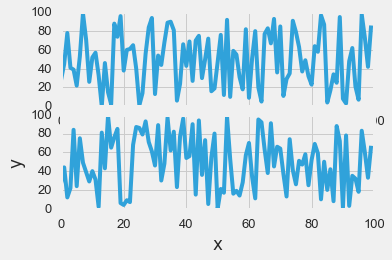

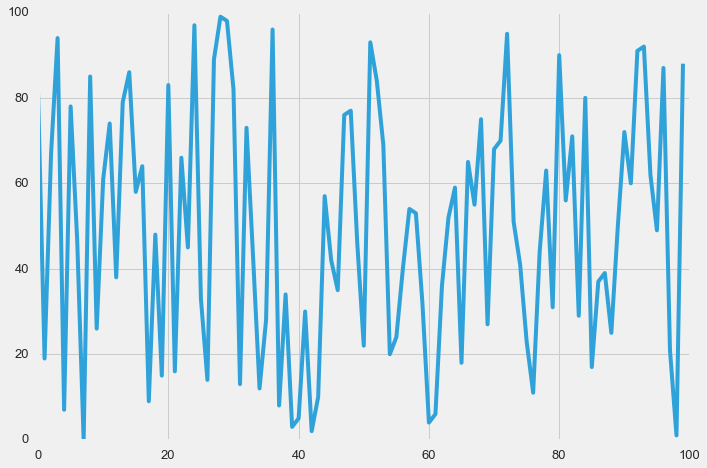

In [79]:
style.use('fivethirtyeight')
fig = plt.figure(figsize=(5,5))

ax0 = plt.subplot2grid((6,2),(0,0),rowspan= 2, colspan= 2)
x0, y0 = generate_date()
ax0.plot(x0, y0)

ax1 = plt.subplot2grid((6,2),(2,0),rowspan= 2, colspan= 2)
x1, y1 = generate_date()
ax1.plot(x1, y1)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

ax2 = plt.subplot2grid((3,3),(0,0),rowspan= 3, colspan= 3)
x2, y2 = generate_date()
ax2.plot(x2, y2)


plt.show()



In [ ]:
# %load ./matplotlib_sourcecode/0404\ -\ incorporating\ subplots\ with\ candlestick\ graph.py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import urllib
import numpy as np
import datetime as dt

from matplotlib import style

style.use('fivethirtyeight')

print(plt.style.available)

print(plt.__file__)


def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def graph_data(stock):

    fig = plt.figure()
    
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1)
    plt.ylabel('Price')
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)

    
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=3m/csv'
    print(url)
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
                                                          unpack = True,
                                                          converters={0: bytespdate2num('%Y%m%d')})


    x = 0
    y = len(date)

    new_list = []
    while x < y:
        append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        new_list.append(append_line)
        x += 1

        
    
    candlestick_ohlc(ax2, new_list, width=.6, colorup='#41ad49', colordown='#ff1717')
    ax2.grid(True)#, color = 'g', linestyle='-', linewidth=3)
    for label in ax2.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


    bbox_props = dict(boxstyle='round4, pad=0.3', fc="y", ec='k', lw=2)
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+8, closep[-1]), bbox = bbox_props)



        
    plt.subplots_adjust(left=.11, bottom=.16, right=.90, top=.95, wspace=.2, hspace=.2)
    plt.show()



stock = input('Stock to plot: ')
graph_data(stock)


In [ ]:
# %load ./matplotlib_sourcecode/0315\ -\ annotating\ specific\ plots.py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import urllib
import numpy as np
import datetime as dt

from matplotlib import style

style.use('fivethirtyeight')

print(plt.style.available)

print(plt.__file__)


def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def graph_data(stock):

    fig = plt.figure()
    
    ax1 = plt.subplot2grid((1,1), (0,0))
    plt.ylabel('Price')
    plt.xlabel('Date')
    
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=3m/csv'
    print(url)
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
                                                          unpack = True,
                                                          converters={0: bytespdate2num('%Y%m%d')})


    x = 0
    y = len(date)

    new_list = []
    while x < y:
        append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        new_list.append(append_line)
        x += 1

        
    
    candlestick_ohlc(ax1, new_list, width=.6, colorup='#41ad49', colordown='#ff1717')
    ax1.grid(True)#, color = 'g', linestyle='-', linewidth=3)
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.annotate('Oil Spill!!', (date[25], highp[25]),
                 xytext=(0.8, 0.9), textcoords='axes fraction',
                 arrowprops=dict(facecolor="#585858", color="#585858"))

    plt.ylabel('Price')


        
    plt.subplots_adjust(left=.09, bottom=.16, right=.94, top=.95, wspace=.2, hspace=.2)
    plt.show()



stock = input('Stock to plot: ')
graph_data(stock)


In [ ]:
# %load ./matplotlib_sourcecode/0313\ -\ Live\ Graphs.py
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.animation as animation
import random

style.use('ourstyle')

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

def animate(i):
    pull_data = open("example.txt", "r").read()
    data_list = pull_data.split('\n')
    xs = []
    ys = []

    for line in data_list:
        if len(line) > 1:
            x, y = line.split(',')
            xs.append(int(x))
            ys.append(int(y))

    ax1.clear()
    ax1.plot(xs, ys)

ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()




In [ ]:
# %load ./matplotlib_sourcecode/0312\ -\ making\ our\ own\ styles.py
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('ourstyle')

for label in range(8):
    x = []
    y = []

    for i in range(1,10):
        ys = random.randrange(0,15)
        xs = i
        x.append(xs)
        y.append(ys)

    plt.plot(x, y, label = label)

plt.legend()
plt.show()


In [ ]:
# %load ./matplotlib_sourcecode/0310\ -\ ohlc\ candlestick\ charts.py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import urllib
import numpy as np
import datetime as dt


def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def graph_data(stock):

    fig = plt.figure()
    
    ax1 = plt.subplot2grid((1,1), (0,0))
    plt.ylabel('Price')
    plt.xlabel('Date')
    
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=3m/csv'
    print(url)
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
                                                          unpack = True,
                                                          converters={0: bytespdate2num('%Y%m%d')})


    x = 0
    y = len(date)

    new_list = []
    while x < y:
        append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        new_list.append(append_line)
        x += 1

        
    
    candlestick_ohlc(ax1, new_list, width=.6, colorup='#41ad49', colordown='#ff1717')
    ax1.grid(True)#, color = 'g', linestyle='-', linewidth=3)


    
    

    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    plt.ylabel('Price')


        
    plt.subplots_adjust(left=.09, bottom=.16, right=.94, top=.95, wspace=.2, hspace=.2)
    plt.show()



stock = input('Stock to plot: ')
graph_data(stock)


In [158]:
# %load ./matplotlib_sourcecode/0304\ -\ converting\ dates\ to\ plot-able\ format.py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib
import numpy as np


def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def graph_data(stock):
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
                                                          unpack = True,
                                                          converters={0: bytespdate2num('%Y%m%d')})
    plt.plot_date(date, closep,'-')
    plt.show()



stock = input('Stock to plot: ')
graph_data(stock)


Stock to plot: tsla


NameError: name 'tsla' is not defined

In [ ]:
# %load ./matplotlib_sourcecode/0306\ -\ adjusting\ plot\ parameters\ and\ more\ date\ info.py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib
import numpy as np
import datetime as dt


def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1d/csv'
    print(url)
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)

    
##    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
##                                                          unpack = True,
##                                                          converters={0: bytespdate2num('%Y%m%d')})

    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
                                                          unpack = True)
    date_conv = np.vectorize(dt.datetime.fromtimestamp)
    date = date_conv(date)
    
    ax1.plot_date(date, closep,'-')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
        

    ax1.grid(True)#, color = 'g', linestyle='-', linewidth=3)
    plt.subplots_adjust(left=.09, bottom=.16, right=.94, top=.95, wspace=.2, hspace=.2)
    plt.show()



stock = input('Stock to plot: ')
graph_data(stock)


In [ ]:
# %load ./matplotlib_sourcecode/0307\ -\ customizing\ ticks.py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib
import numpy as np
import datetime as dt


def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def graph_data(stock):

    fig = plt.figure()
    
    ax1 = plt.subplot2grid((1,1), (0,0))
    plt.ylabel('Price')
    plt.xlabel('Date')
    
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1d/csv'
    print(url)
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)

    
##    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
##                                                          unpack = True,
##                                                          converters={0: bytespdate2num('%Y%m%d')})

    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
                                                          unpack = True)
    date_conv = np.vectorize(dt.datetime.fromtimestamp)
    date = date_conv(date)
    
    ax1.plot_date(date, closep,'-')
    ax1.grid(True)#, color = 'g', linestyle='-', linewidth=3)
    ax1.yaxis.label.set_color('m')
    ax1.xaxis.label.set_color('c')
    ax1.set_yticks([83.5, 84, 84.5])
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)



        
    plt.subplots_adjust(left=.09, bottom=.16, right=.94, top=.95, wspace=.2, hspace=.2)
    plt.show()



stock = input('Stock to plot: ')
graph_data(stock)


In [ ]:
# %load ./matplotlib_sourcecode/0305\ -\ modifying\ labels,\ adding\ grid.py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib
import numpy as np


def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
                                                          unpack = True,
                                                          converters={0: bytespdate2num('%Y%m%d')})
    plt.plot_date(date, closep,'-')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
        

    ax1.grid(True)#, color = 'g', linestyle='-', linewidth=3)
    
    plt.show()



stock = input('Stock to plot: ')
graph_data(stock)


In [ ]:
# %load ./matplotlib_sourcecode/0316\ -\ dynamic\ annotation\ of\ last\ price.py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import urllib
import numpy as np
import datetime as dt

from matplotlib import style

style.use('ourstyle')

print(plt.style.available)

print(plt.__file__)


def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def graph_data(stock):

    fig = plt.figure()
    
    ax1 = plt.subplot2grid((1,1), (0,0))
    plt.ylabel('Price')
    plt.xlabel('Date')
    
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=3m/csv'
    print(url)
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
                                                          unpack = True,
                                                          converters={0: bytespdate2num('%Y%m%d')})


    x = 0
    y = len(date)

    new_list = []
    while x < y:
        append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        new_list.append(append_line)
        x += 1

        
    
    candlestick_ohlc(ax1, new_list, width=.6, colorup='#41ad49', colordown='#ff1717')
    ax1.grid(True)#, color = 'g', linestyle='-', linewidth=3)
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
##    ax1.annotate('Oil Spill!!', (date[25], highp[25]),
##                 xytext=(0.8, 0.9), textcoords='axes fraction',
##                 arrowprops=dict(facecolor="#585858", color="#585858"))

    bbox_props = dict(boxstyle='round4, pad=0.3', fc="y", ec='k', lw=2)
    ax1.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+5, closep[-1]), bbox = bbox_props)

    plt.ylabel('Price')


        
    plt.subplots_adjust(left=.11, bottom=.16, right=.90, top=.95, wspace=.2, hspace=.2)
    plt.show()



stock = input('Stock to plot: ')
graph_data(stock)


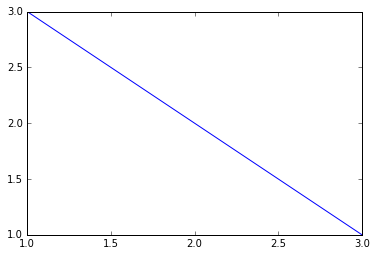

In [4]:
plt.plot([1,2,3],[3,2,1])
plt.show()